## Import Libraries 

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN,KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score ,homogeneity_score, completeness_score, v_measure_score,adjusted_rand_score

from sklearn_extra.cluster import KMedoids


## load Data


In [63]:
data=pd.read_csv('filtered_data.csv')
print(data['CLASS'].value_counts())

filteredData=data.drop(['CLASS','ID','No_Pation','HDL'],axis=1)


CLASS
2    587
0     56
1     36
Name: count, dtype: int64


In [64]:
true_labels=data["CLASS"].values


In [65]:
filteredData

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,LDL,VLDL,BMI
0,0,-1.753516,2.3,24,4.0,2.9,1.0,1.5,0.4,-1.861247
1,0,-0.859644,2.0,50,4.0,3.6,1.3,2.1,0.6,-1.206898
2,1,-1.217193,4.7,47,4.0,2.9,0.8,1.6,0.4,-1.206898
3,0,-1.753516,4.6,54,5.1,4.2,1.7,2.2,0.8,-1.425014
4,0,-0.859644,3.5,39,4.0,4.0,1.5,2.2,0.7,-1.206898
...,...,...,...,...,...,...,...,...,...,...
674,1,1.285649,6.3,82,6.7,5.3,2.0,3.5,0.9,0.123610
675,0,0.391777,4.1,70,9.3,5.3,3.3,1.4,1.3,-0.116318
676,0,0.034228,4.1,34,13.9,5.4,1.6,3.1,0.7,0.756146
677,1,0.034228,3.1,39,8.5,5.0,2.5,2.9,0.7,-0.552550


## Db Scan

In [66]:
normalizer = MinMaxScaler()

for col in filteredData.columns:
    
    filteredData[col] = normalizer.fit_transform(filteredData[col].values.reshape(-1, 1))





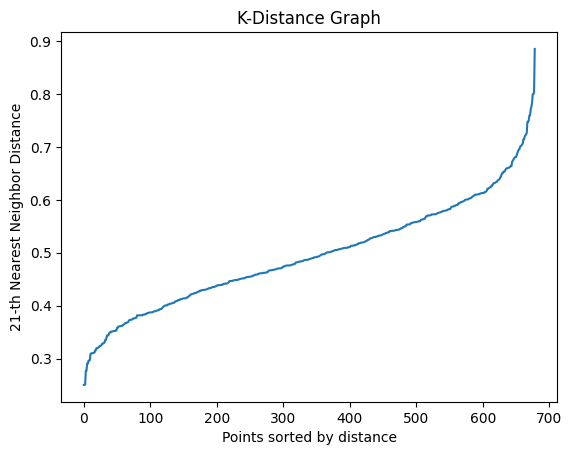

In [67]:
min_samples = 21 # rule of thumb

neighbors = NearestNeighbors(n_neighbors=min_samples)

neighbors_fit = neighbors.fit(filteredData)

distances, indices = neighbors_fit.kneighbors(filteredData)

# Sort distances for the k-th nearest neighbor
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.show()


### from the graph eps is approximatley equal 0.4 (the elbow)

## Iterate to get best eps

In [68]:
for eps in range(3,10):
    dbscan=DBSCAN(eps=eps/10,min_samples=7).fit(filteredData)
    print(dbscan.labels_)

[-1 -1 -1  0  0 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
  1  0  1 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1  0  1  0  1
  0 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0  0 -1  0  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1
 -1  2 -1  1 -1  2 -1 -1 -1 -1 -1 -1  2  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1  2  1 -1  1 -1  1  1 -1 -1 -1  6 -1  6  2 -1 -1  2 -1  1
 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  2  1  3 -1 -1 -1  3  3 -1  1  1
 -1  1  3 -1  2 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  1
  1 -1 -1 -1 -1 -1  2  2  1  1  2 -1  1 -1  1  1 -1 -1  1 -1  1 -1  1 -1
  1 -1 -1  1 -1  2 -1  1 -1  2  1 -1  1 -1 -1  2 -1  1 -1 -1 -1  2 -1 -1
 -1  1  1 -1 -1  2 -1  1 -1  2 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1
 -1 -1  2 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  1 -1  1

In [69]:
dbscan=DBSCAN(eps=0.4,min_samples=7).fit(filteredData)
print(dbscan.labels_)


# 0.6 100

[ 0  0  1  0  0  1  0  0  0  0  1  0 -1  0 -1  0  0 -1  1  1  0  0  1 -1
  1  0  1  0  1  0  0  0  0  0  0  1 -1  1 -1  1 -1 -1  0  0  0 -1  1  0
 -1 -1 -1 -1  1 -1  0  0 -1  1  1 -1  1  1  0 -1  0 -1  1  0  0  1  0  1
  0 -1  1  1  1  0 -1  0  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1  0  0  0
 -1  1  1 -1  0  0  0  1  1 -1 -1 -1  0  0  0  0  1  0  0  0  0  0  0 -1
  1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1
 -1  0 -1  1 -1  0 -1  0  0  0 -1  0  0  1 -1  1  1  1  1 -1  1 -1 -1  1
 -1  0  0 -1 -1  0  1  1  1  1  1  1  0  0  1  0  1  0  0  0 -1  0 -1  1
  1 -1  0  1  1  0  0 -1  0  1  0  1  0  0  1  1  0  1  1  1  1  0  1  1
  1  1  1  1  0  0  1  1  0  0  0  0  0  1  1 -1  1 -1 -1  1 -1 -1  0  1
  1 -1  1 -1 -1  1  0  0  1  1  0  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1
  1  1  0  1  0  0  1  1  1  0  1  1  1  0 -1  0 -1  1  1  0 -1  0 -1  0
  1  1  1  0  0  0 -1  1  0  0 -1  0  1  1  1 -1  1  1 -1  1 -1 -1  1  1
  1  1  0  1  1  1 -1  1  1  0 -1  1  0  0  1  1  1

In [70]:
true_labels=data["CLASS"].values

ari = adjusted_rand_score(true_labels, dbscan.labels_)
homogeneity = homogeneity_score(true_labels, dbscan.labels_)
completeness = completeness_score(true_labels, dbscan.labels_)
v_measure = v_measure_score(true_labels, dbscan.labels_)

print(f"Adjusted Rand Index: {ari}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Adjusted Rand Index: 0.007141404853813233
Homogeneity: 0.017389148202523384
Completeness: 0.007923444993298142
V-Measure: 0.010886435711829606


### silhouette Score

In [71]:
dbscan_sil_score=silhouette_score(filteredData, dbscan.labels_)
print(f'silhouette Score : {dbscan_sil_score}')

silhouette Score : 0.21511042623299215


## KMeans

In [72]:
kmeans=KMeans(n_clusters=3,random_state=42,max_iter=500).fit(filteredData)
kmeans.labels_


array([2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

### Assigning true label for test measures 

In [73]:
true_labels=data["CLASS"].values


In [74]:
ari = adjusted_rand_score(true_labels, kmeans.labels_)
homogeneity = homogeneity_score(true_labels, kmeans.labels_)
completeness = completeness_score(true_labels, kmeans.labels_)
v_measure = v_measure_score(true_labels, kmeans.labels_)

print(f"Adjusted Rand Index: {ari}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")


Adjusted Rand Index: 0.08849147786592193
Homogeneity: 0.22367478485361306
Completeness: 0.11312573833297632
V-Measure: 0.15025733893540535


### silhouette Score 

In [75]:
Kmeans_sil_score=silhouette_score(filteredData, kmeans.labels_)
print(f'silhouette Score : {Kmeans_sil_score}')


silhouette Score : 0.2940720342819768


## K medoid Model

In [76]:
kmedoids = KMedoids(n_clusters=3, random_state=42,max_iter=1000)
kmedoids.fit(filteredData)
kmedoids_sil_score=silhouette_score(filteredData, kmedoids.labels_)

### silhouette Score 

In [77]:
print(f'silhouette Score : {kmedoids_sil_score}')

silhouette Score : 0.24059249096296076


### Test model with ARI,Homogeneity,Completeness and V measures

In [78]:
ari = adjusted_rand_score(true_labels, kmedoids.labels_)
homogeneity = homogeneity_score(true_labels, kmedoids.labels_)
completeness = completeness_score(true_labels, kmedoids.labels_)
v_measure = v_measure_score(true_labels, kmedoids.labels_)

print(f"Adjusted Rand Index: {ari}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")


Adjusted Rand Index: 0.1058826008186639
Homogeneity: 0.2451691156855826
Completeness: 0.12000016368767775
V-Measure: 0.16113257973905803


### label distribution 

In [79]:
diab_labels_dict = dict()

for i in kmedoids.labels_:
    diab_labels_dict[i] = diab_labels_dict.get(i, 0) + 1
    
print('KMedoids labels distribution')
print(diab_labels_dict)
diab_labels_dict_true = dict()
for i in true_labels:
    diab_labels_dict_true[i] = diab_labels_dict_true.get(i, 0) + 1
    
print('true labels distribution')
print(diab_labels_dict_true)

KMedoids labels distribution
{0: 319, 1: 94, 2: 266}
true labels distribution
{0: 56, 1: 36, 2: 587}
